# Анализ рынка общественного питания Москвы

- Автор: Владимиров Николай Александрович
- Дата: 29.10.2025

### Цели и задачи проекта

Провести анализ рынка общественного питания Москвы на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.
На основе анализа инвесторы из фонда Shut Up and Take My Money примут решение об открытии заведения общественного питания в Москве: : кафе, ресторан или бар.

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым 
    0 — заведение не является сетевым;
    1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill `— хранит среднюю стоимость заказа в виде диапазона
- `middle_avg_bil`l — число с оценкой среднего чека
- `middle_coffee_cup` — число с оценкой одной чашки капучино

### Содержимое проекта

<font color='#777778'>- [1. Загрузка данных и знакомство с ними](#1.-Загрузка-данных-и-знакомство-с-ними)
  - [Подготовка единого датафрейма](#Подготовка-единого-датафрейма)
- [2. Предобработка данных](#2.-Предобработка-данных)
  - [Промежуточный вывод](#Промежуточный-вывод)
- [3. Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)
  - [Задача 1. Категории заведений](#Задача-1)
  - [Задача 2. Распределение по административным округам](#Задача-2)
  - [Задача 3. Сетевые и несетевые заведения](#Задача-3)
  - [Задача 4. Количество посадочных мест](#Задача-4)
  - [Задача 5. Рейтинг заведений](#Задача-5)
  - [Задача 6. Корреляция рейтинга](#Задача-6)
  - [Задача 7. Топ-15 ](#Задача-7)
  - [Задача 8. Средний чек по районам](#Задача-8)
  - [Промежуточный вывод](#Промежуточный-вывод)
- [4. Итоговый вывод и рекомендации](#4.-Итоговый-вывод-и-рекомендации)</font>

---

## 1. Загрузка данных и знакомство с ними


In [1]:
import pandas as pd

In [2]:
!pip install phik

     |████████████████████████████████| 677 kB 2.3 MB/s eta 0:00:01


In [3]:
import phik
from phik import phik_matrix

In [4]:
df_inf = pd.read_csv('/datasets/rest_info.csv')

In [5]:
df_pr = pd.read_csv('/datasets/rest_price.csv')

In [6]:
display(df_inf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

In [7]:
display(df_inf.head())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


База данных `rest_info.csv` имеет 9 столбцов и 8406 строк. Пропуски встречаются в столбцах `hours` и `seats`. Типы данных представленны верно, но разрядность `chain` можно поменять.     


In [8]:
display(df_pr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

In [9]:
display(df_pr.head())

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


В датафрейме `rest_price.csv` 5 столбцов и 4058 строчек. Пропуски встречаются во всех столбцах, кроме id.

### Подготовка единого датафрейма


In [10]:
df = pd.merge(df_inf, df_pr, how='left', on='id')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [12]:
print("Процент потерянных данных при объединении таблиц:",round((len(df_inf)-len(df))/len(df_inf)*100,2), "%")

Процент потерянных данных при объединении таблиц: 0.0 %


В объединенном датафрейме 13 колонок и 8406 строчек.

In [13]:

temp = df.copy() 
len(temp)

8406

## 2. Предобработка данных


In [14]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['seats'] = pd.to_numeric(df['seats'], downcast='integer')

In [15]:
for column in ['rating','middle_avg_bill','middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(3), float64(1), int8(1), object(8)
memory usage: 763.4+ KB


None

In [17]:
print(df.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


In [18]:
round(df.isna().sum() / df.shape[0]*100, 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

- Пропуск в столбце `hours` составляет 6,38% или 536.
- В столбце `seats` 42.96% или 3611 - не все категории заведений имеют посадочные места, заменим пропуски на -1.  
- В `price` 60.56% или 5091 
- В `avg_bil`l 54.60% или 4590, есть заведения, где не указаны ценовые данные
- В `middle_avg_bill` 62.54% или 5257 зависит от `avg_bill` и пропуски тоже. 
- В `middle_coffee_cup` 93.64% или 7871 Скорее всего цены указаны только для заведенй где продают кофе. Зависит от столбца `avg_bill`. 

Все данные были добавлены пользователями или найдены в общедоступных источниках, что могло привести к пропускам в определенных колонках. `price`, `avg_bil`, `middle_avg_bill`, `middle_coffee_cup` - отсавлю без изменений.

In [19]:
df['hours'] = df['hours'].fillna('Часы работы неизвестны')

In [20]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

8406 8406 0.0


In [21]:
df['seats'] = df['seats'].fillna(-1).astype(int)

In [22]:
display(df['category'].unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(3), int64(1), int8(1), object(8)
memory usage: 763.4+ KB


In [24]:
df.duplicated().sum()

0

Полных дубликатов не обнаружено.

In [25]:
#перевожу в нижний регистр
df['address'] = df['address'].str.lower().str.strip()
df['name'] = df['name'].str.lower().str.strip()

In [26]:
#подсчет дубликатов в address
sum_duplicates = df.duplicated(subset=['address', 'name'], keep='first').sum()
print(sum_duplicates)

4


In [27]:
df = df.drop_duplicates(subset=['address', 'name'], keep='first')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              8402 non-null   int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(3), int64(1), int8(1), object(8)
memory usage: 763.1+ KB


In [29]:
df['is_24_7'] = (df['hours'] == 'ежедневно, круглосуточно')
print(df['is_24_7'].sum())

730


In [30]:
sum_duplicates_id = df.duplicated(subset='id', keep='first').sum()
print(sum_duplicates_id)

0


In [31]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод


Объединил таблицы /rest_info.csv и /rest_price.csv с помощью merge(left).

Заменил пропуски в `hours` - 536 пропусков на заглушки: 'Часы работы неизвестны'.

Изменил разрядность у столбцов - `rating`, `middle_avg_bill`, `middle_coffee_cup` c float64 на float32. У `chain` на int8.
У `seats` на int16.

В `seats` есть заведения где нет посадочных мест или отсутствуют данные - 3611 заведений, заменил пропуски на -1. 

Явных полных дубликатов не обнаружено.

Перевел `address` и `name` в нижний регистр и по этим двум столбцам искал дубликаты. Найдено 4 дубликата. Удалил. Потеря составила всего 0.05%

Создал солбец с режимом работы - `is_24_7`(круглосуточно), таких заведений оказалось 730.

## 3. Исследовательский анализ данных


---

### Задача 1


In [32]:
category_sum = df['category'].value_counts()

In [33]:
display(category_sum)

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [34]:
category_sum_pr = df['category'].value_counts(normalize=True)
display(round(category_sum_pr, 2)*100)

кафе               28.0
ресторан           24.0
кофейня            17.0
бар,паб             9.0
пиццерия            8.0
быстрое питание     7.0
столовая            4.0
булочная            3.0
Name: category, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
category_sort = category_sum.sort_values(ascending=True)

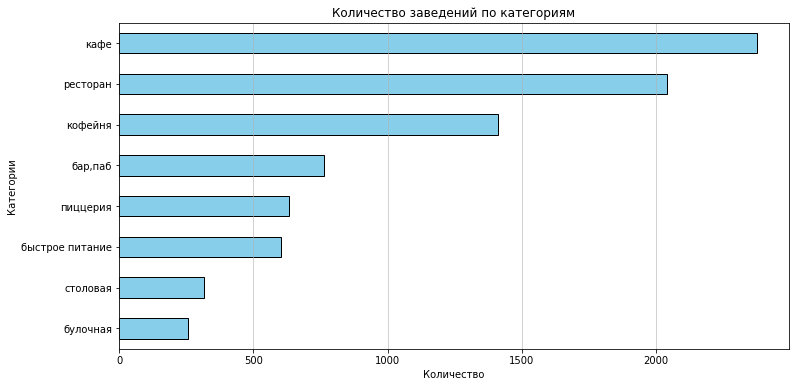

In [37]:
graf = category_sort.plot(kind='barh', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.grid(axis='x', alpha=0.7)
plt.title('Количество заведений по категориям')
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.show()

Количество кафе лидирует - 2002 или 28%. Рестораны на втором месте - 1968 или 24%. Кафейни - 1398 или 17%. Очень мало булочных всего 249 или 3%. Так же столовых немного побольше чем булочных, ног тоже мало заведений - 315 или 4%.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [38]:
district_count = df['district'].value_counts()
display(district_count)

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [39]:
district_count_pr = df['district'].value_counts(normalize=True)
display(round((district_count_pr*100), 2))

Центральный административный округ         26.68
Северный административный округ            10.69
Южный административный округ               10.62
Северо-Восточный административный округ    10.59
Западный административный округ            10.12
Восточный административный округ            9.50
Юго-Восточный административный округ        8.50
Юго-Западный административный округ         8.44
Северо-Западный административный округ      4.87
Name: district, dtype: float64

In [40]:
district_sort = district_count.sort_values(ascending=True)

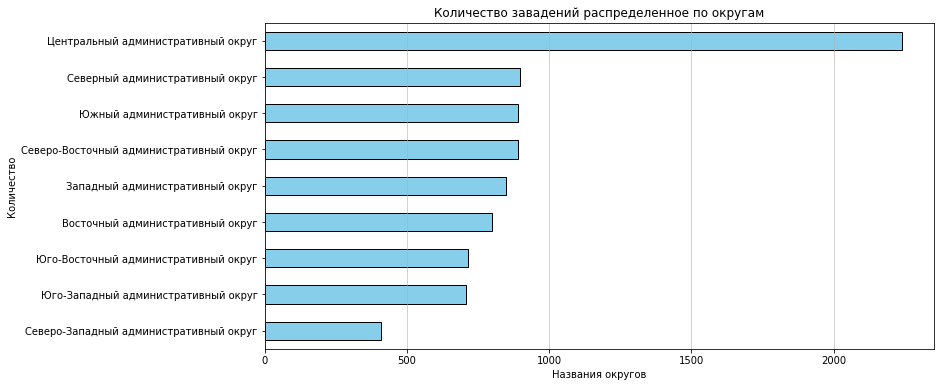

In [41]:
graf_1 = district_sort.plot(kind='barh', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.grid(axis='x', alpha=0.7)
plt.title('Количество завадений распределенное по округам')
plt.xlabel('Названия округов')
plt.ylabel('Количество')
plt.show()

Количество заведений в Центральном административном округе 2211 или 28%. По 10% заведений у Северного, Северо-Восточного и Южного округов. На последним месте в количестве 369 заведений или 4,69% - Северо-Завадный административный округ. 

In [42]:
district_centr = df[df['district'] == 'Центральный административный округ']
district_value_category = district_centr['category'].value_counts()
display(district_value_category)

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [43]:
district_value_procent = district_centr['category'].value_counts(normalize=True)
display(round(district_value_procent*100, 2))

ресторан           29.88
кафе               20.70
кофейня            19.09
бар,паб            16.24
пиццерия            5.04
быстрое питание     3.88
столовая            2.94
булочная            2.23
Name: category, dtype: float64

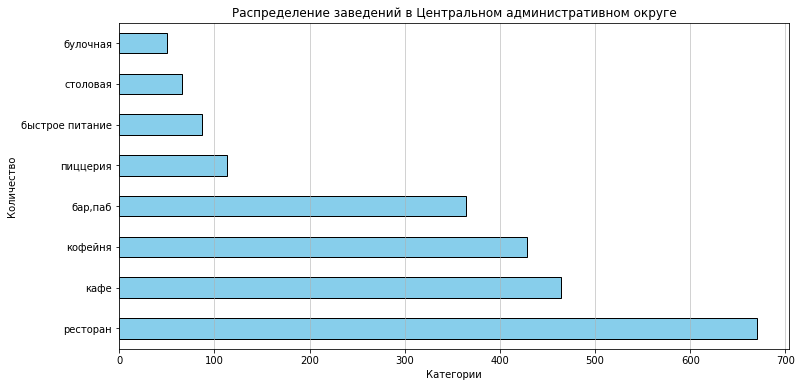

In [44]:
graf_2 = district_value_category.plot(kind='barh', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Распределение заведений в Центральном административном округе')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.grid(axis='x', alpha=0.7)
plt.show()

По сравнению со всеми округами где преобладали кафе, в Центральном административном округе преобладает количество ресторанов  - 665, что составляет 30%. 

По 20% составляют кофейни и кафе. Пабов и баров - 16% или 364, по всем округам было всего 9%. 

Булочные, как и на общих данных, составляют меньшую часть в ЦАО - 2,26% или 50 заведений.


---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [45]:
chain_count = df['chain'].value_counts()

In [46]:
display(chain_count)

0    5199
1    3203
Name: chain, dtype: int64

In [47]:
chain_procent = df['chain'].value_counts(normalize=True)

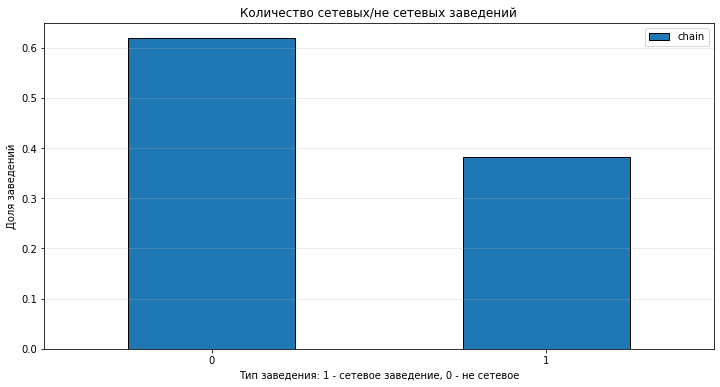

In [48]:
chain_procent.plot(kind='bar', rot=0, legend=True, figsize=(12, 6), edgecolor='black')
plt.grid(axis='y', alpha=0.3)
plt.title('Количество сетевых/не сетевых заведений')
plt.xlabel('Тип заведения: 1 - сетевое заведение, 0 - не сетевое')
plt.ylabel('Доля заведений')
plt.show()

Несетевых заведений - 5199, с долей 61%. Сетевых заведений - 3203, с долей 39%.

In [49]:
chain_grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
display(chain_grouped)

chain,0,1
category,,
"бар,паб",0.780105,0.219895
булочная,0.386719,0.613281
быстрое питание,0.615257,0.384743
кафе,0.672138,0.327862
кофейня,0.490446,0.509554
пиццерия,0.478673,0.521327
ресторан,0.642997,0.357003
столовая,0.720635,0.279365


In [50]:
chain_set = round(chain_grouped[1], 2)
chain_set_sort = chain_set.sort_values(ascending=False)

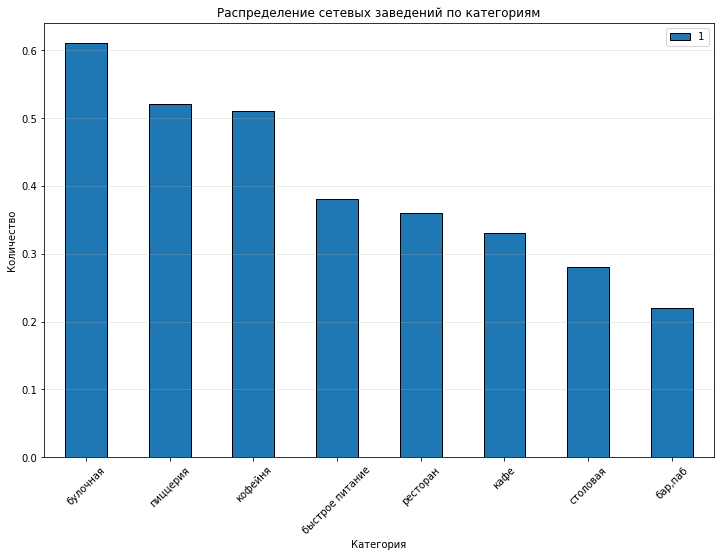

In [51]:
chain_set_sort.plot(kind='bar', legend=True, rot=45, figsize=(12, 8), edgecolor='black')
plt.title('Распределение сетевых заведений по категориям')
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.show()

Несетевых заведений - 5199, с долей 61%. Сетевых заведений - 3203, с долей 39%.

Булочных по количеству заведений мало, но доля сетевых булочных составляет 61%.

Пиццерия и кофейни имеют по 51% сетевых заведений.

Бары и пабы чаще несетевые, доля сетевых заведений всего 21%.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [52]:
df_seats = df[df['seats'] != -1]

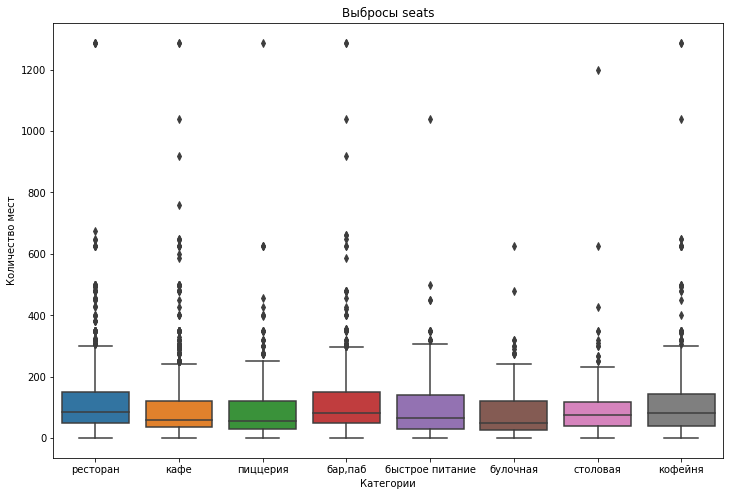

In [53]:
#seats_box = df_seats['seats'].plot(kind = 'box', vert=False, figsize=(12, 8))
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_seats, x = 'category', y = 'seats')
plt.title('Выбросы seats')
plt.xlabel("Категории")
plt.ylabel('Количество мест')
#plt.xlabel('')
plt.show()

Все категории имееют выбросы, особено заметно в категориях: кафе, рестораны, кофейни. Скорее всего это заведения в спортивно-концертных коплексах, фуд-корты в ТЦ, аэропорты, вокзалы.

In [54]:
df_seats_category_median = df_seats.groupby('category')['seats'].median()
display(df_seats_category_median)

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

Рестораны, пабы, столовые самые вместительные, что им и свойственно. Кофейни тоже имеют большую вместительность судя по данным, но скорее всего это связано с тем что большинство кофеен находится в ТЦ, аэропртах, вокзалах где мног опосадочных мест. 
У пиццерий обычно акцент сделан на доставку, поэтому посадочных мест мало.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [55]:
display(df['rating'].describe())

count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Половина заведений с рейтингом 4,3 - имееют высокое качество. 25% заведений с рейтингом 4,4 - выше качество услуг и удовлетворённость клиентов.

Норма у всех заведений рейтинг выше 4.

In [56]:
rating_stat = df.groupby('category')['rating'].describe()
display(rating_stat)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566001,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


In [57]:
rating_category = df.groupby('category')['rating'].mean()
rating_sort = rating_category.sort_values(ascending=True)

In [58]:
#display(round(rating_sort, 2))

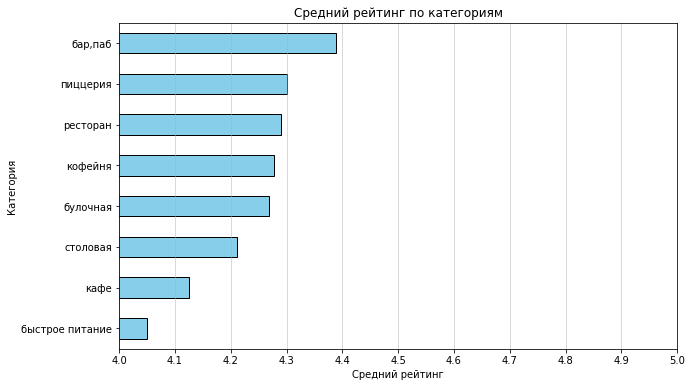

In [59]:
graf_3 = rating_sort.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.grid(axis='x', alpha=0.6)
plt.xlim(4.0, 5.0)
plt.xticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0])
plt.title('Средний рейтинг по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')
plt.show()

Лидер по рейтингу бары и пабы - 4,39. У ресторанов немного ниже 4,29. Пицерии 4.30.

У пиццерий самый низкий std, что может говорить об стабильном качестве услуг и блюд во всех заведениях.

Самый низкий рейтинг у быстрого питания - быстроая скорость, нет акцента на качестве блюд.

У кафе большой std, что говрит об большой разности рейтинга. но все равно 75% заведений с рейтингом 4 и выше. 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация столбчатой диаграммой рейтинга заведений по категориям.</font>

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [60]:
df_copy = df.copy()

In [61]:
import numpy as np

In [62]:
df_copy['seats'] = df_copy['seats'].replace(-1, np.nan)
#df_copy['hours'] = df_copy['hours'].replace('Часы работы неизвестны', np.nan)

In [63]:
correlation_matrix = df_copy[['rating', 'category','district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
#correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
rating_corr = correlation_matrix['rating'].drop('rating').sort_values(ascending=False)
display(rating_corr)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


price       0.262056
category    0.198739
district    0.189453
is_24_7     0.161010
chain       0.118857
seats       0.000000
Name: rating, dtype: float64

In [64]:
# Комментарий ревьюера
df['seats'].value_counts().head(2)

-1     3610
 40     253
Name: seats, dtype: int64

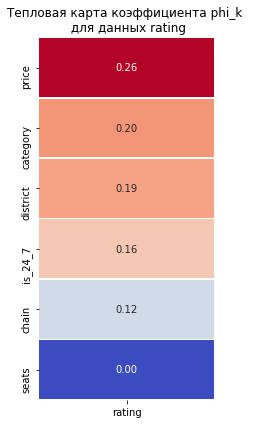

In [65]:
plt.figure(figsize=(3, 6))
data_heatmap = pd.DataFrame(rating_corr)

sns.heatmap(data=data_heatmap, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=False)
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.ylabel('')
plt.tight_layout()
plt.show()

Наибольшая корреляция rating связана с ценовой политикой - `price`(0.22) и второе место с категорией заведения - `district`(0.20). 0 корреляция rating показывает с количеством мест `seats`, вообще нет никакой связи.

In [66]:
price_rating_cor = df_copy.groupby('price')['rating'].describe()
display(price_rating_cor)

,count,mean,std,min,25%,50%,75%,max
price,,,,,,,,
высокие,478.0,4.436611,0.314197,1.0,4.3,4.4,4.6,5.0
выше среднего,564.0,4.386347,0.223507,2.9,4.3,4.4,4.5,5.0
низкие,156.0,4.173077,0.372671,2.6,4.0,4.2,4.4,5.0
средние,2117.0,4.297874,0.295653,1.6,4.2,4.3,4.4,5.0


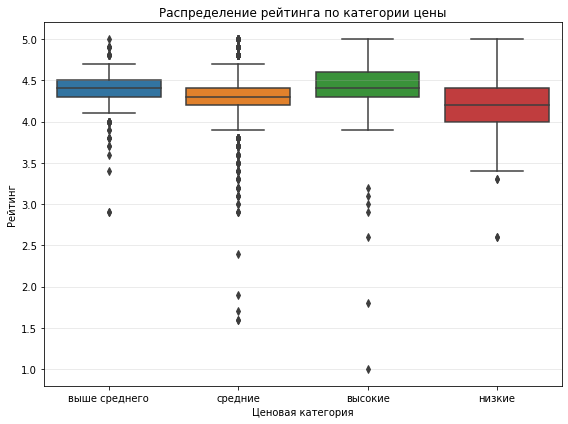

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copy, x='price', y='rating')
plt.title('Распределение рейтинга по категории цены')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

У "Высокие" - стабильно высокое качество, рейтинг 4.44, std 0.31, 25% заведений имеют рейтинг выше 4.6 - отличное качество сервиса, блюд и помещений.

У низких цен самый низкий рейтинг и большйо разброс, что видно на графике и std 0.373.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [68]:
df_set = df[df['chain'] == 1]

In [69]:
top15 = df_set.groupby('name').agg(count=('name', 'size'), rating=('rating', 'mean'), category=('category', 'first')).reset_index()
top15['rating'] = round(top15['rating'], 2)

In [70]:
top15 = top15.sort_values(by='count', ascending=False).head(15)

In [71]:
print('Топ 15 популярных сетевых заведений Москвы:')
display(top15)

Топ 15 популярных сетевых заведений Москвы:


,name,count,rating,category
729,шоколадница,120,4.18,кофейня
335,домино'с пицца,76,4.17,пиццерия
331,додо пицца,74,4.29,пиццерия
146,one price coffee,71,4.06,кофейня
742,яндекс лавка,69,3.87,ресторан
58,cofix,65,4.08,кофейня
168,prime,50,4.12,ресторан
664,хинкальная,44,4.32,быстрое питание
409,кофепорт,42,4.15,кофейня
418,кулинарная лавка братьев караваевых,39,4.39,кафе


In [72]:
top15 = top15.sort_values(by='count', ascending=True).head(15)

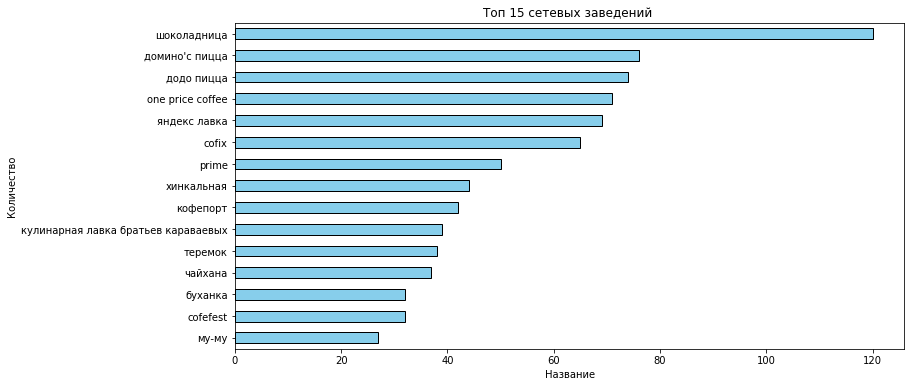

In [73]:
name_count = top15.plot(kind='barh', x='name', y='count', color='skyblue', 
    edgecolor='black', figsize=(12, 6), legend=False)
plt.title('Топ 15 сетевых заведений ')
plt.xlabel('Название')
plt.ylabel('Количество')
plt.show()

In [74]:
top15_rating = top15.sort_values(by='rating', ascending=True)

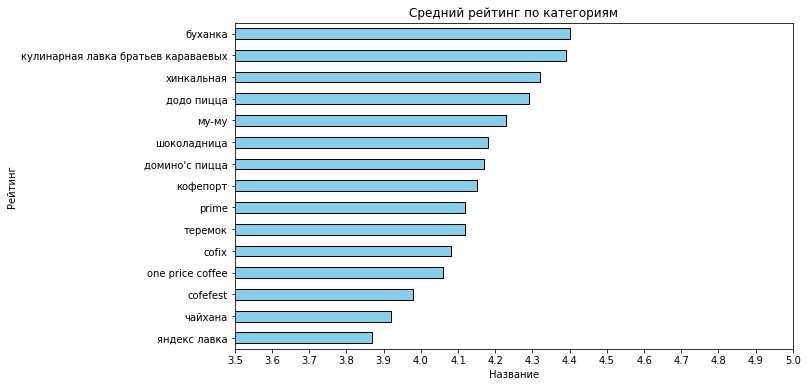

In [75]:
name_count = top15_rating.plot(kind='barh', x='name', y='rating', color='skyblue', 
    edgecolor='black', figsize=(10, 6), legend=False)
plt.title('Топ 15 сетевых заведений ')
plt.xlim(3.5, 5.0)
plt.xticks([3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0])
plt.title('Средний рейтинг по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')
plt.xlabel('Название')
plt.ylabel('Рейтинг')
plt.show()

"Шоколадница" лидер по количеству заведений -120шт и хороший рейтинг 4.18, категория - кофейня.

В топ 3 входят две пиццерии Доминос с 77 заведениями и "Додо пицца" с 74. Но у Додо пицца выше рейтинг 4.29 против 4.17, а это говорит о качестве всей сети. 

Самый высокий рейтинг у "буханка" 4.4 с 32 заведениями, категория булочная. И у "кулинарная лавка братьев караваевых" рейтинг 4.39 с 39 заведениями - что говорит о том, что в погоне за масштабируемостью как у "Шоколадница" не нужно забывать о качестве заведений.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [76]:
temp2 = df['middle_avg_bill']

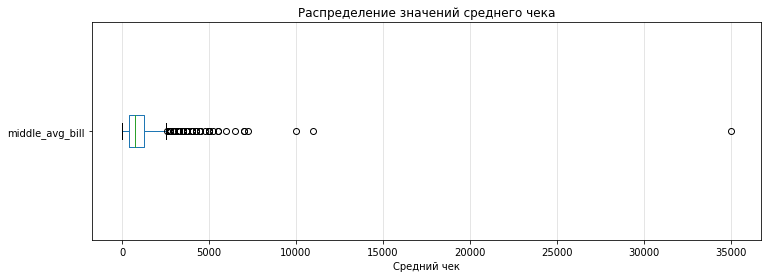

In [77]:
gr1 = temp2.plot(kind='box', figsize=(12, 4), vert=False)
plt.grid(axis='x', alpha=0.4)
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.show()

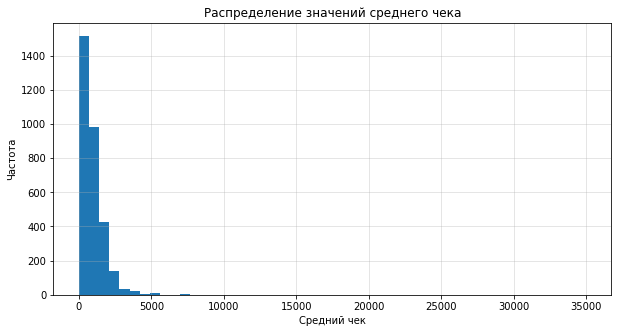

In [78]:
gr2 = temp2.plot(kind='hist', figsize=(10, 5), bins=50)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0.4)
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.show()

Распределение среднего чека без разбивки по округам показал, что основные показатели среднего чека до 2000 рублей с пиковой частотой 1450 наблюдений. 

Большинсво чеков не превышают 5000 руб., сильный правый скос в боксе - есть несколько больших чеков в диапозоне до 35000 руб.

In [79]:
district_price = df.groupby('district')['middle_avg_bill'].describe()[['mean', '50%']]

In [80]:
display(district_price)

,mean,50%
district,,
Восточный административный округ,820.626953,575.0
Западный административный округ,1053.225464,1000.0
Северный административный округ,927.959656,650.0
Северо-Восточный административный округ,716.611267,500.0
Северо-Западный административный округ,822.222900,700.0
Центральный административный округ,1191.057495,1000.0
Юго-Восточный административный округ,654.097961,450.0
Юго-Западный административный округ,792.561707,600.0
Южный административный округ,834.398071,500.0


---


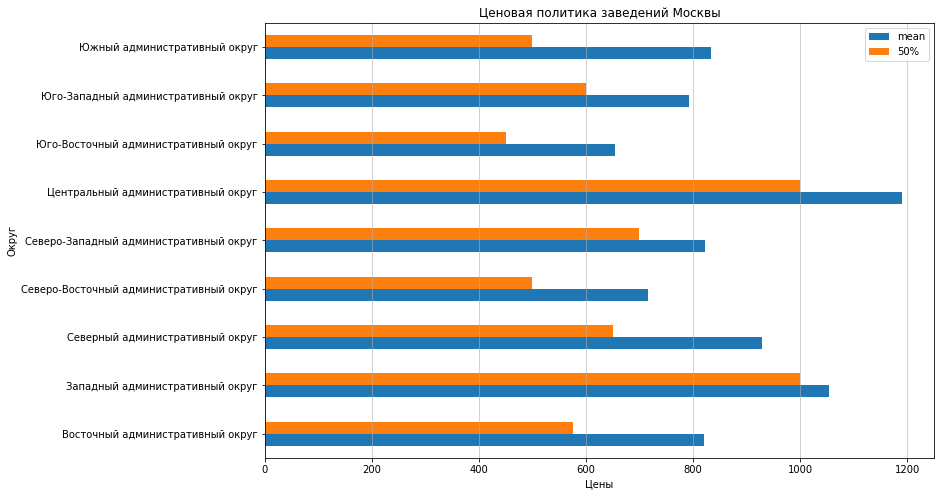

In [81]:
district_graf = district_price.plot(kind='barh', figsize=(12,8))
plt.title('Ценовая политика заведений Москвы')
plt.grid(axis='x', alpha=0.7)
plt.xlabel('Цены')
plt.ylabel('Округ')
plt.show()

ЦАО и ЗАО - выские значения: медиана 1000 руб, среднее больше 1000 руб. в данных округах наблюдаются высокие чеки, значит высокое обслуживание и качество блюд. 

ЮВАО - низкие цены: медиана 450 руб - бюджетные заведения, низкие цены.

Разница в ЦАО в 191 руб между средним и медианой говорит о высоких выбросах, есть заведения примиум класса с высоким средним чеком, дорогие рестораны, заведения в аэропортах. 



---

### Промежуточный вывод




**Анализ рынка общественного питания Москвы выявил:**

   - **Категории - лидеры по количеству**: кафе - 2002, рестораны - 1968 и  кофейни - 1398.  
   - **Самая маленькая категория**: булочные - 249 и  столовые 230.  
   - кафе — самый массовый формат


   - **ЦАО** имеет 28% всех заведений - 2211, в ЦАО топ категория -  рестораны 30%.  
   - **ЮВАО** имеет наименьший охват всего 412 заведений.  
   - ЦАО основная зона активности
   
   
   - Несетевых заведений 61%, 39% сетевых
   - Сетевые заведения популярны в категориях кофейнях и пиццериях
   - **Топ-3 заведения по количеству:** "Шоколадница" 120, "Домино Пицца" - 77, "Додо пицца" - 74
   - **Высокий рейтинг заведений** у "буханка" 4.4 , "кулинарная лавка братьев караваевых" -4.39, "Додо Пицца" - 4.29
   - Масштабность сети не всегда говорит о ее качестве
   
  
   - Все категории имееют рейтинг больше 4.0  
   - **Высокий рейтинг у категорий** бар/паб - 4.39 и пиццерия и рестораны по 4.30.  
   - **Плохой рейтинг у категории**: быстрое питание - 4.06.  
   - Формат заведения влияет на качество и оценку пользователей.
   
   - Общее распределение среднего чека: много чеков на до 2000 руб., 75% чеков до 5000 руб., выбросы до 35 000 руб.


   - Наибольшая корреляция rating связана с ценовой политикой - price(0.22) и второе место с категорией заведения -   district(0.20). 
   - 0 корреляция rating показывает с количеством мест seats, вообще нет никакой связи.
  
   - **ЦАО и ЗАО** имеют медиану 1000 руб, среднее больше 1100 руб - много заведений высокого сегмента.  
   - **ЮВАО** - бюджетный сегмент.  
   - Расположение заведений взависимости от района регулирует ценовую политику.


## 4. Итоговый вывод и рекомендации


#### Цель и задачи проекта
Провести анализ рынка общепита Москвы (лето 2022) на основе данных Яндекс.Карт и Яндекс.Бизнес.  
**Цель**: помочь инвесторам фонда **"Shut Up and Take My Money"** выбрать **оптимальный формат и локацию** для открытия **кафе, ресторана или бара**.

---

#### Показатели


**Всего заведений**  8406 

**Лидеры по количеству** кафе -2002, рестораны - 1968

**Лидер по доле** ЦАО - 28% или 2211

**Сетевые** 39% или 3087, популярны кофейни и пиццерии 

**Топ по рейтингу** у "кулинарная лавка братьев караваевых" - 4.39, "Додо Пицца" - 4.29

**Средний чек** ЦАО - 1000 руб, ЮВАО - 450 руб



#### выводы по разделам

**Предобработка**  Объедил данные, обработал пропуски, полные дубликаты отсутствуют

**Категории**  Кафе - массовый сегмент

**Районы** ЦАО - центр спроса и предложения, ЮВАО - маленький спрос 

**Сети**  Масштаб не повышает рейтинг

**Рейтинг**  Зависит от цен и района, не зависит от количества мест

**Средний чек** ЦАО и ЗАО - высокий, ЮВАО - низкий

---

#### Рекомендации


Можно попробовать открыть **Кофейню** в **ЦАО** ценовой сегмент 900–1200 руб - высокий трафик, денежная аудитория, придерживаться высокого рейтинга

Если **Ресторан** или **Бар** в **ЦАО** или **ЗАО** чек выше 1200 руб - высокий трафик,  высокий чек, денежная аудитория

Если **Пиццерия** в **ВАО, ЮАО, СВАО** с чеокм 600–800 руб - ориентир на сеть, проференный формат, масштабируемость

Не рассматривать округ **ЮВАО** - Низкий чек, низкие ожидания

Не рассматривать категории  **Булочные** и **столовые** - низкий спрос

Быстрое **Быстрое питание** имеет низкий общий рейтинг - 4.06, если преуспеть и повысить рейтинг, такое быстрое питание сможет стать популярным. 